In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import random as rd
import math

## Binomial Distribution

### Question

In the old days, there was a probability of 0.8 of success in any attempt to make a telephone call. (This often depended on the importance of the person making the call, or the operator's curiosity!)

Calculate the probability of having 7 successes in 10 attempts.

In [2]:
stats.binom.pmf(7, 10, 0.8)

0.20132659200000014

P(X<= 7)?

In [3]:
stats.binom.cdf(7, 10, 0.8)

0.3222004736

P(X<7)?

In [4]:
stats.binom.cdf(6.9, 10, 0.8)

0.12087388159999987

***

### Question 

A (blindfolded) marksman finds that on the average he hits the target 4 times out of 5. If he fires 4 shots, what is the probability of

(a) more than 2 hits?

(b) at least 3 misses?

***

## Poisson Distribution

### Question

A bank is interested in studying the number of people who use the ATM located outside its office late at night.
On average, 1.6 customers walk up to the ATM during any 10 minute interval between 9pm and midnight.

What is lambda λ for this problem?

What is the probability of exactly 3 customers using the ATM during any 10 minute interval?

What is the probability of 3 or fewer people?

In [5]:
customer = 1.6

In [6]:
poissonDist = stats.poisson(customer)

In [7]:
dist = []

print("r\tp(r)")
for i in range(10):
    dist.append(poissonDist.pmf(i))
    print(str(i) + "\t" + str(poissonDist.pmf(i)))

r	p(r)
0	0.20189651799465538
1	0.32303442879144867
2	0.25842754303315896
3	0.13782802295101812
4	0.05513120918040725
5	0.017641986937730322
6	0.004704529850061418
7	0.001075321108585467
8	0.00021506422171709355
9	3.8233639416372204e-05


In [8]:
poissonDist.pmf(0) + poissonDist.pmf(1) + poissonDist.pmf(2) + poissonDist.pmf(3)

0.9211865127702812

In [9]:
poissonDist.cdf(3)

0.9211865127702811

In [10]:
# 4 or more customers
1 - poissonDist.cdf(3)

0.07881348722971893

## EXERCISE 2

The Indiana Department of Transportation is concerned about the number of deer being struck by cars between Martinsville and Bloomington. They note the number of deer carcasses and other deer-related accidents over a 1-month period in a 2-mile intervals. 

What is the probability of zero deer strike incidents during any 1-month period in a 2-mile interval between Martinsville and Bloomington?

0.08 strikes per/day

In [11]:
stats.poisson.pmf(0, 0.08*30)

0.09071795328941251

***

## Normal Distribution

### Question

Suppose scores on an IQ test are normally distributed. If the test has a mean of 100 and a standard deviation of 10, what is the probability that a person who takes the test will score between 90 and 110?


In [12]:
stats.norm(100, 10).cdf(110) - stats.norm(100, 10).cdf(90)

0.6826894921370859

In [13]:
stats.norm.cdf(110, 100, 10) - stats.norm.cdf(90, 100, 10)

0.6826894921370859

***

## Confidence Intreval

### Question

In [14]:
sample_list = [2, 3, 5, 6, 9]

In [15]:
sample_mean = np.mean(sample_list)

sample_mean

5.0

In [16]:
std = 2.5

In [17]:
n = len(sample_list)

In [18]:
cl = 0.90

In [19]:
critic_value = stats.norm.ppf(((1-cl)/2) + cl)
critic_value

1.6448536269514722

In [20]:
lower_limit = sample_mean - (critic_value * (std/math.sqrt(n)))
lower_limit

3.160997738549714

In [21]:
upper_limit = sample_mean + (critic_value * (std/math.sqrt(n)))
upper_limit

6.839002261450286

In [22]:
print(f'Your {cl} z confidence interval is ({lower_limit:.2f}, {upper_limit:.2f})')

Your 0.9 z confidence interval is (3.16, 6.84)


In [23]:
stats.norm.interval(cl, loc=sample_mean, scale=std/math.sqrt(n))

(3.160997738549713, 6.839002261450286)

## Exercise 

In [24]:
import pandas as pd

df = pd.read_csv("samples.csv")

In [25]:
sample_mean = df['Demand'].mean()
sample_mean

370.16

In [26]:
std = 75

n = len(df['Demand'])

cl = 0.95

In [27]:
critic_value = stats.norm.ppf(((1-cl)/2) + cl)
critic_value

1.959963984540054

In [28]:
lower_limit = sample_mean - (critic_value * (std/math.sqrt(n)))
lower_limit

340.7605402318992

In [29]:
upper_limit = sample_mean + (critic_value * (std/math.sqrt(n)))
upper_limit

399.55945976810085

In [30]:
print(f'Your {cl} z confidence interval is ({lower_limit:.2f}, {upper_limit:.2f})')

Your 0.95 z confidence interval is (340.76, 399.56)


Using Scipy

In [31]:
stats.norm.interval(cl, loc=sample_mean, scale=std/math.sqrt(n))

(340.7605402318992, 399.55945976810085)

In [32]:
sample_mean = 38

std = 6.5

n = 25

cl = 0.95

In [33]:
stats.norm.interval(cl, loc=sample_mean, scale=std/math.sqrt(n))

(35.45204682009793, 40.54795317990207)

***

## One Sample t Test

Analyze if college students get 7.2 hours of sleep, on average, based on a sample of students: alpha=0.05

H0: mu = 7.2

Ha: mu != 7.2

In [34]:
import pandas as pd
import scipy.stats as stats
import math

In [35]:
df = pd.read_csv('students.csv')

In [36]:
df.head()

,ID,Gender,Classification,Height,Shoe Size,Phone Time,# of Shoes,Birth order,Pets,Happy,...,Exercise,Stat Pre,Stat Post,Phone Type,Sleep,Social Media,Impact of SocNetworking,Political,Animal,Superhero
0,1,male,senior,67.75,7.0,12.0,12.0,youngest,5.0,0.80,...,360,3.0,NaN,iPhone,7.0,180.0,worse,Democrat,Dog person,Batman
1,2,male,freshman,71.00,7.5,1.5,5.0,middle,4.0,0.75,...,200,9.0,NaN,Android smartphone,7.0,20.0,better,Democrat,Dog person,Batman
2,3,female,freshman,64.00,6.0,25.0,15.0,oldest,8.0,0.90,...,30,7.0,5.0,Android smartphone,8.0,60.0,better,Republican,Dog person,Batman
3,4,female,freshman,63.00,6.5,30.0,30.0,middle,12.0,0.98,...,180,6.0,7.0,iPhone,6.0,60.0,better,Republican,Both,Superman
4,5,male,senior,69.00,6.5,23.0,8.0,oldest,4.0,0.75,...,180,4.0,7.0,iPhone,5.5,60.0,worse,Independent,Dog person,Superman


In [37]:
onesample = stats.ttest_1samp(df['Sleep'], 7.2)

In [38]:
onesample.statistic

-1.92552134000487

In [39]:
onesample.pvalue

0.05795525591903326

In [40]:
df['Sleep'].mean()

6.8618421052631575

In [41]:
print(f'p-value for two sided test: {onesample.pvalue:.4f}')

p-value for two sided test: 0.0580


In [42]:
alpha = 0.05
p_value = onesample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of Ha.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


The principal of the school thinks that the average hours of sleep is at most 7.2

H0: mu = 7.2

Ha: mu < 7.2

In [43]:
print(f'p-value for one sided test: {onesample.pvalue/2:.4f}')

p-value for one sided test: 0.0290


In [44]:
alpha = 0.05
p_value = onesample.pvalue/2

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of Ha.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of Ha.


## Tests on the Difference in Means of Two Normal Distributions, Variances Unknown and Equal

In [45]:
df = pd.read_csv("catalysts.csv")

In [46]:
df

,Observation Number,Catalyst1,Catalyst2
0,1,91.50,89.19
1,2,94.18,90.95
2,3,92.18,90.46
3,4,95.39,93.21
4,5,91.79,97.19
5,6,89.07,97.04
6,7,94.72,91.07
7,8,89.21,92.75


In [47]:
xbar1 = df['Catalyst1'].mean()
xbar2 = df['Catalyst2'].mean()

s1 = df['Catalyst1'].std()
s2 = df['Catalyst2'].std()

In [48]:
print('xbar1 = {:.3f}'.format(xbar1))
print('xbar2 = {:.3f}'.format(xbar2))

print('s1 = {:.3f}'.format(s1))
print('s2 = {:.3f}'.format(s2))

xbar1 = 92.255
xbar2 = 92.732
s1 = 2.385
s2 = 2.983


In [49]:
s_pooled = math.sqrt(((len(df['Catalyst1']) - 1) * (s1 ** 2) + (len(df['Catalyst2']) - 1) * (s2 ** 2)) / (len(df['Catalyst1']) - 1 + len(df['Catalyst2']) - 1))
print('spooled = {:.3f}'.format(s_pooled))

spooled = 2.701


In [50]:
t_statistic = (xbar1-xbar2)/(s_pooled*math.sqrt(1/len(df['Catalyst1']) + 1/len(df['Catalyst2'])))

print ('t_statistic = {:.3f}'.format(t_statistic))

t_statistic = -0.354


In [51]:
# df = n1+n2 - 2

p_value = 2*stats.t.cdf(-0.35, 14)

print ('p_value = {:.3f}'.format(p_value))

p_value = 0.732


In [52]:
alpha = 0.05

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of Ha.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.


### Scipy.stats.ttest for 2 groups

In [53]:
twogroups = stats.ttest_ind(df['Catalyst1'], df['Catalyst2'], equal_var = True)

In [54]:
print(f't statistic for two sided: {twogroups.statistic:.4f}')
print(f'p-value for two sided: {twogroups.pvalue:.4f}')

t statistic for two sided: -0.3536
p-value for two sided: 0.7289


## Arsenic Example

In [55]:
df = pd.read_csv("arsenic.csv")

In [56]:
df

,Metro Phoenix,x1,Rural Arizona,x2
0,Phoenix,3,Rimrock,48
1,Chandler,7,Goodyear,44
2,Gilbert,25,New River,40
3,Glendale,10,Apache Junction,38
4,Mesa,15,Buckeye,33
5,Paradise Valley,6,Nogales,21
6,Peoria,12,Black Canyon City,20
7,Scottsdale,25,Sedona,12
8,Tempe,15,Payson,1
9,Sun City,7,Casa Grande,18


In [57]:
twogroups = stats.ttest_ind(df['x1'], df['x2'], equal_var = True)

In [58]:
print(f't statistic for two sided: {twogroups.statistic:.4f}')
print(f'p-value for two sided: {twogroups.pvalue:.4f}')

t statistic for two sided: -2.7669
p-value for two sided: 0.0127


In [59]:
alpha = 0.05
p_value = twogroups.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of Ha. We can say that there is difference between means of two communities'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of Ha. We can say that there is difference between means of two communities


In [60]:
df['x1'].mean()

12.5

In [61]:
df['x2'].mean()

27.5

## Paired Sample T Test

In [62]:
df = pd.read_csv('prozac.csv')
df

,moodpre,moodpost,difference
0,3,5,2
1,0,1,1
2,6,5,-1
3,7,7,0
4,4,10,6
5,3,9,6
6,2,7,5
7,1,11,10
8,4,8,4


In [63]:
pairedtest = stats.ttest_rel(df['moodpre'], df['moodpost'])

In [64]:
onetailed_pvalue= pairedtest.pvalue / 2
onetailed_pvalue

0.006872912197394244

In [65]:
df = pd.read_csv('students.csv')

In [66]:
df['Height']

0     67.75
1     71.00
2     64.00
3     63.00
4     69.00
      ...  
71    65.00
72    62.00
73    65.00
74    65.00
75    65.00
Name: Height, Length: 76, dtype: float64

In [67]:
stats.shapiro(df['Happy'])

ShapiroResult(statistic=nan, pvalue=1.0)

# Statistics Exercise

## Probality

### #1

Answer the following questions by calculating the number of ways of obtaining particular arrangements of objects and events.

1. An athlete has eight different trophies, but only has room for four trophies in a display cabinet. How many different ways is it possible to display just four trophies out of eight, assuming that the display order is important?
2. A football manager has a squad of 20 players. How many different teams of 11 players could be selected from the squad? (Hint: Assume that positions of the players are not important)

***

### #2

Are people happy in their marriages? The table shows results from the 2008 General Social Survey for married adults classified by gender and level of happiness.

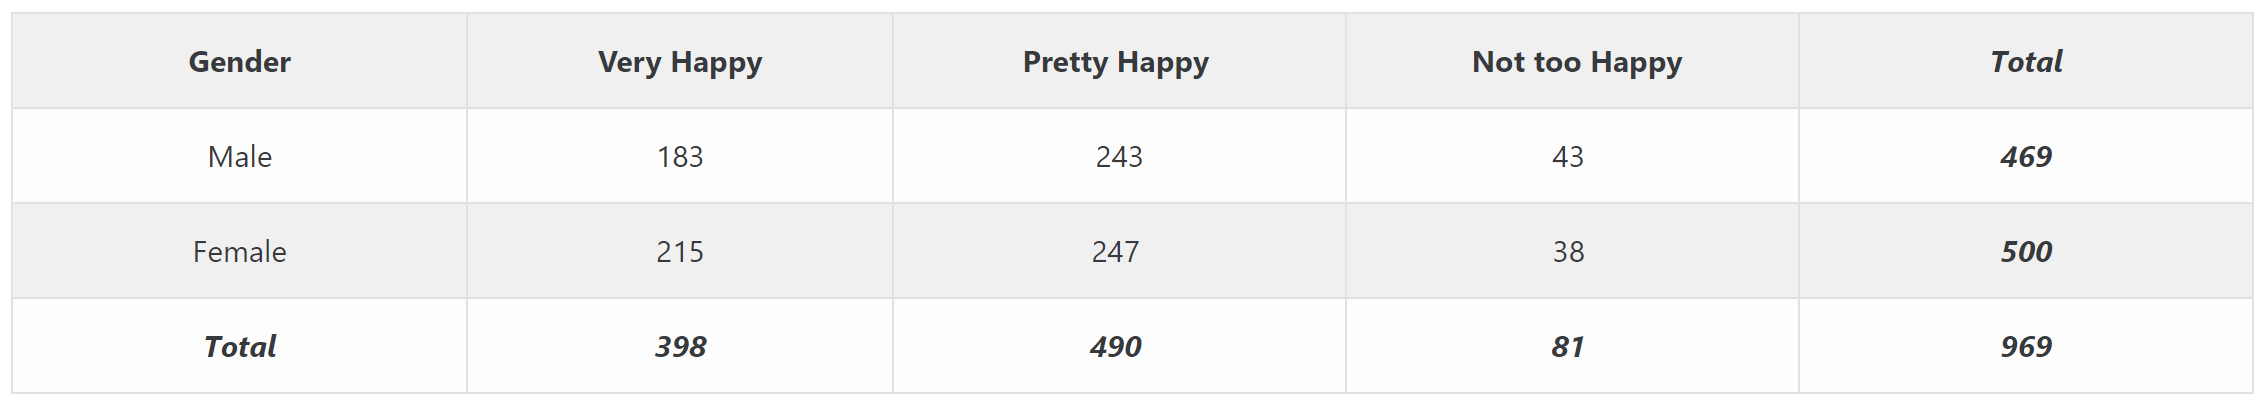

1. Estimate the probability that a married adult is very happy.
2. Estimate the probability that a married adult is very happy,
    * given that their gender is male and
    * given that their gender is female.
3. For these subjects, are the events being very happy and being a male independent?

***

### #3

The Triple Blood Test screens a pregnant woman and provides as estimated risk of her baby being born with the genetic disorder Down syndrome. A study of 5282 women aged 35 or over analyzed the Triple Blood Test to test its accuracy.

A contingency table for Triple Blood Test of Down syndrome shown below.
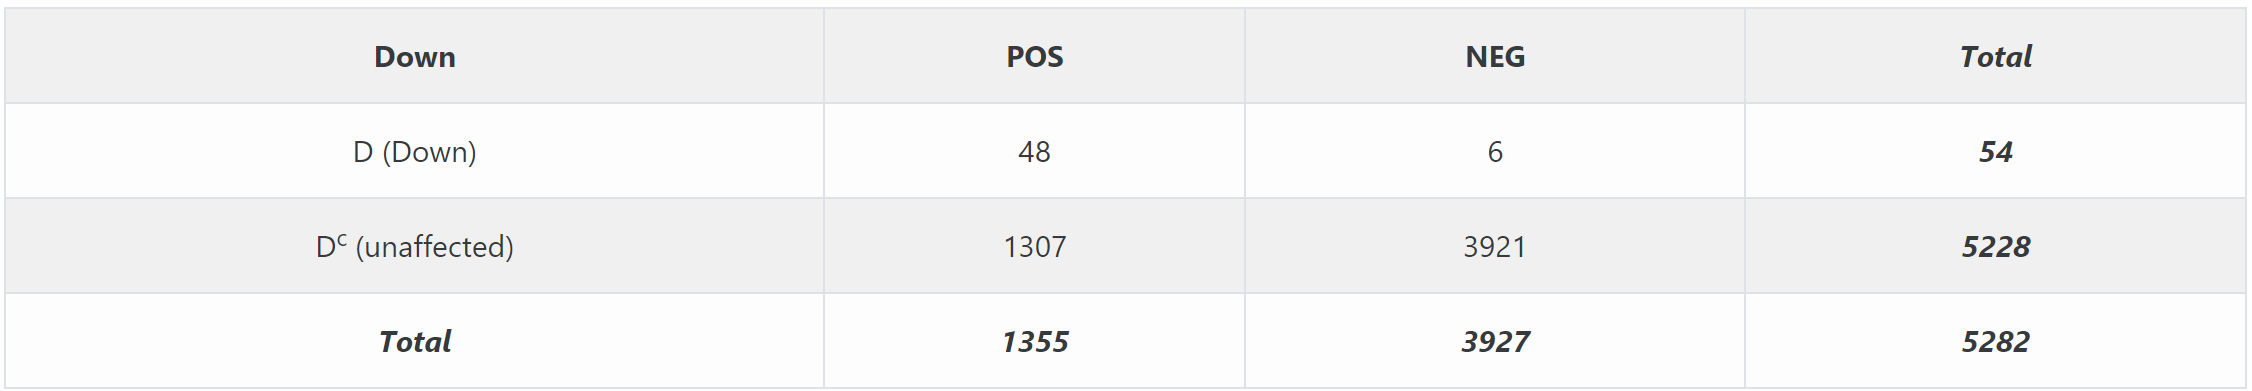

1. Given that a test result is negative, show that the probability the fetus actually has Down syndrome is P(D|NEG) = 0.0015.2. 
2. Is P(D|NEG) equal to P(NEG | D)? If so, explain why. If not, find P(NEG | D).

***

### #4

Males and females are observed to react differently to a given set of circumstances. It has been observed that 70% of the females react positively to these circumstances, whereas only 40% of males react positively -. A group of 20 people, 15 female and 5 male, was subjected to these circumstances, and the subjects were asked to describe their reactions on a written questionairre. A response picked at random from the 20 was negative. What is the probability that it was that of a male? 

***

## Probability Distribution

### #1

Create a binomial cumulative distribution table for n=10 using Python scipy.stats. You should get something like this:
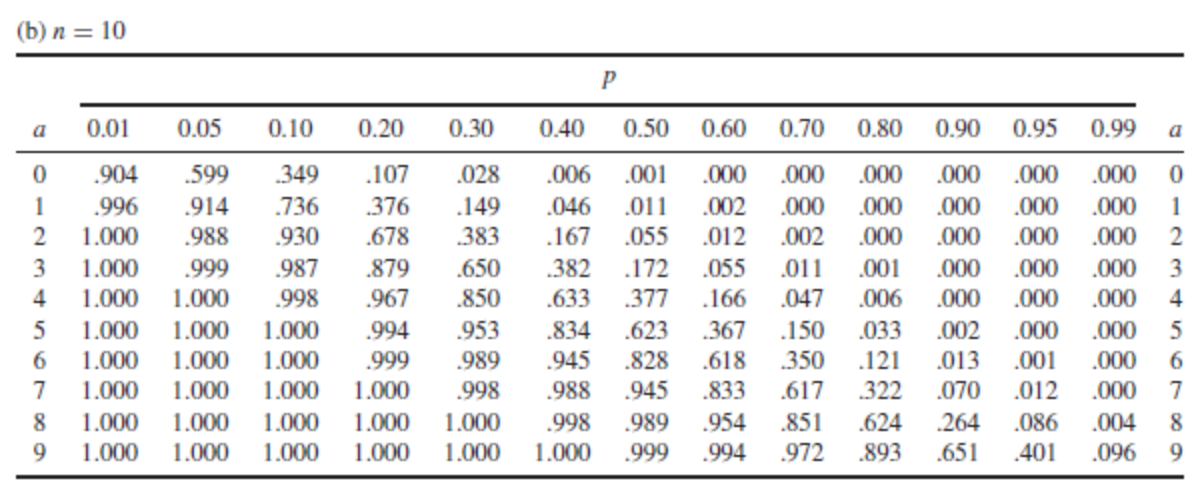

***

### #2

Answer the following questions by looking at the distribution table or coding with Python.

1. A salesperson has found that the probability of a sale on a single contact is approximately .3. If the salesperson contacts 10 prospects, what is the approximate probability of making at least one sale?
2. Ten coins are tossed simultaneously. Find the probability of getting
    * at least seven heads
    * exactly seven heads
    * at most seven heads

***

### #3

Answer the following questions by looking at the distribution table or coding with Python.

1. A type of tree has seedlings dispersed in a large area with a mean density of five seedlings per square yard. What is the probability that none of ten randomly selected one-square yard regions have seedlings?
2. Let Y denote a random variable that has a Poisson distribution with mean λ = 2. Find
    * P(Y = 4)
    * P(Y ≥ 4)
    * P(Y < 4)
    * P(Y ≥ 4 | Y ≥ 2 )

***

### #4

Consider binomial experiment for n = 20, p = .05. 

1. Calculate the binomial probabilities for Y = 0, 1, 2, 3, and 4.
2. Calculate the same probabilities by using the Poisson approximation with λ = np. Compare.

***

### #5

Create a Standard Normal Distribution Table using Python scipy.stats.

***

### #6

The cycle time for trucks hauling concrete to a highway construction site is uniformly distributed over the interval 50 to 70 minutes. What is the probability that the cycle time exceeds 65 minutes  if it is known that the cycle time exceeds 55 minutes?

***

### #7

The width of bolts of fabric is normally distributed with mean 950 mm (millimeters) and standard deviation 10 mm.

1. What is the probability that a randomly chosen bolt has a width of between 947 and 958mm?
2. What is the appropriate value for C such that a randomly chosen bolt has a width less than C with probability .8531?

***

### #8

The school board administered an IQ test to 20 randomly selected teachers. They found that the average IQ score was 114 with a standard deviation of 10. Assume that the cumulative probability is 0.90. What population mean would have produced this sample result?

***

## Central Limit Theorem and Confidence Interval

### #1

Suppose scores on exams in statistics are normally distributed with an unknown population mean and a population standard deviation of 3 points. A random sample of 36 scores is taken and gives a sample mean (sample  mean score) of 68. Find a confidence interval estimate for the population mean exam score (the mean score on all exams).

***

### #2

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker7 yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

***

### #3

The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.
Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

***

## Hypothesis Testing

### #1

The hourly wages in a particular industry are normally distributed with mean 13.20 USD and standard deviation 2.50 USD. A company in this industry employs 40 workers, paying them an average of 12.20 USD per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test.

***

### #2

Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

***